Visual story telling part 1: green buildings

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from greenbuildings.csv
data = pd.read_csv("/Users/gaytririyavasal/Downloads/greenbuildings.csv")

Actual Rent v.s. Cluster Rent | Green Buildings

In [137]:
data = data[data['green_rating'] == 1]

cluster_rent = data['cluster_rent']
actual_rent = data['Rent']

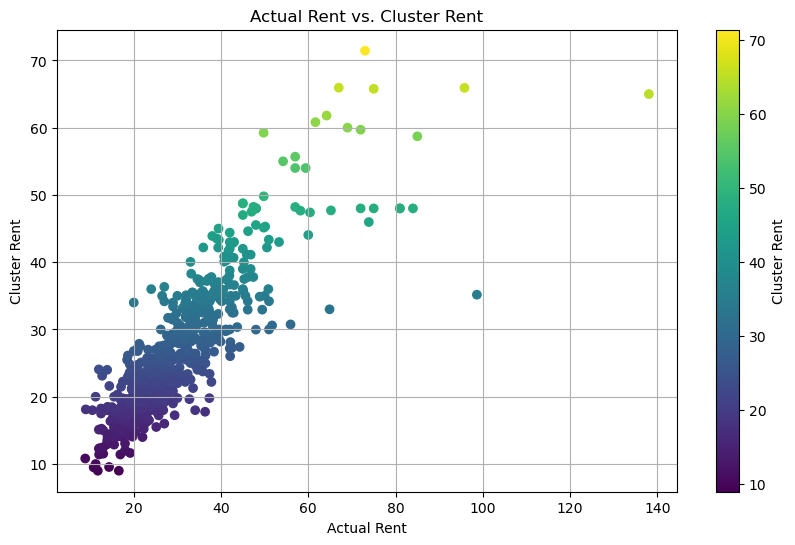

In [138]:
plt.figure(figsize=(10, 6))
plt.scatter(actual_rent, cluster_rent, c=cluster_rent, cmap='viridis', marker='o')
plt.colorbar(label='Cluster Rent')
plt.xlabel('Actual Rent')
plt.ylabel('Cluster Rent')
plt.title('Actual Rent vs. Cluster Rent')
plt.grid(True)
plt.show()

Actual Rent v.s. Cluster Rent | Non-Green Buildings

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from greenbuildings.csv
data = pd.read_csv("/Users/gaytririyavasal/Downloads/greenbuildings.csv")

In [140]:
data = data[data['green_rating'] == 0]

cluster_rent = data['cluster_rent']
actual_rent = data['Rent']

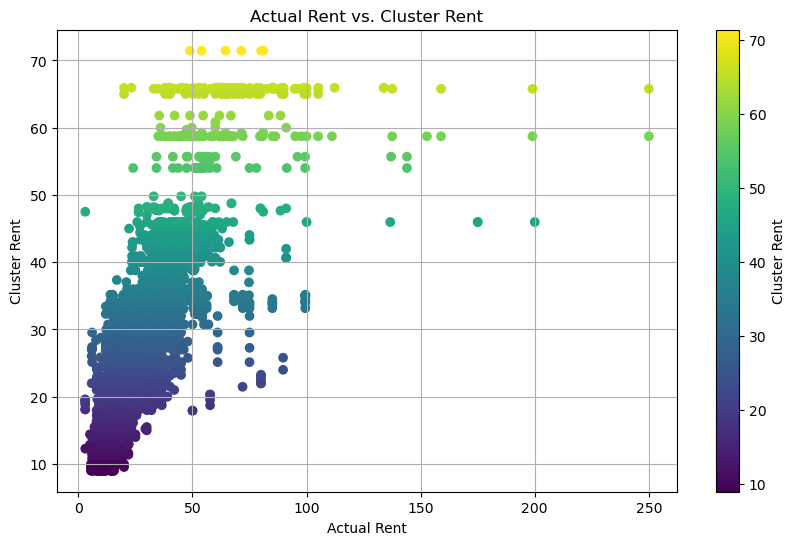

In [141]:
plt.figure(figsize=(10, 6))
plt.scatter(actual_rent, cluster_rent, c=cluster_rent, cmap='viridis', marker='o')
plt.colorbar(label='Cluster Rent')
plt.xlabel('Actual Rent')
plt.ylabel('Cluster Rent')
plt.title('Actual Rent vs. Cluster Rent')
plt.grid(True)
plt.show()

From these two visualizations, it can be deduced that the rent of buildings indeed has some correlation with cluster rent, thus recognizing a confounding variable that could be potentially impacting rent.

Building Age v.s. Rent | Green Buildings

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from greenbuildings.csv
data = pd.read_csv("/Users/gaytririyavasal/Downloads/greenbuildings.csv")

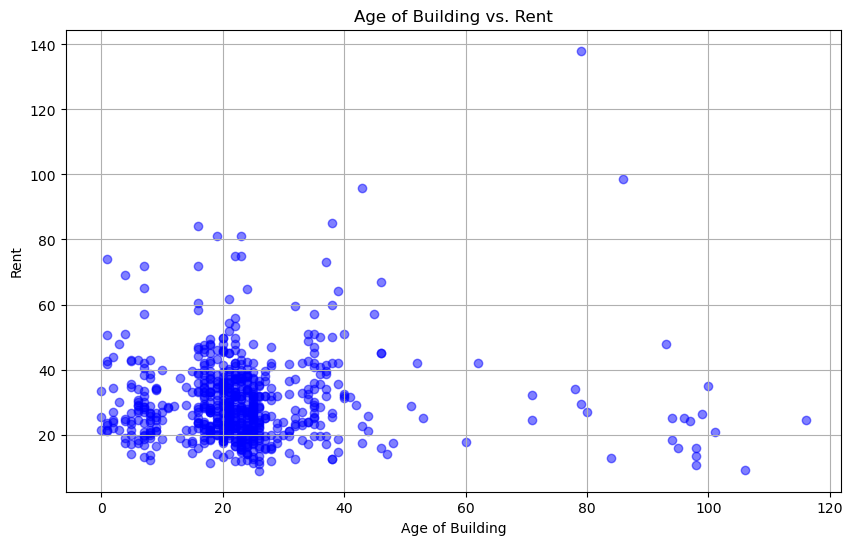

In [143]:
data = data[data['green_rating'] == 1]

age = data['age']
rent = data['Rent']

plt.figure(figsize=(10, 6))
plt.scatter(age, rent, color='blue', marker='o', alpha=0.5)
plt.xlabel('Age of Building')
plt.ylabel('Rent')
plt.title('Age of Building vs. Rent')
plt.grid(True)
plt.show()

Building Age v.s. Rent | Non-Green Buildings

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from greenbuildings.csv
data = pd.read_csv("/Users/gaytririyavasal/Downloads/greenbuildings.csv")

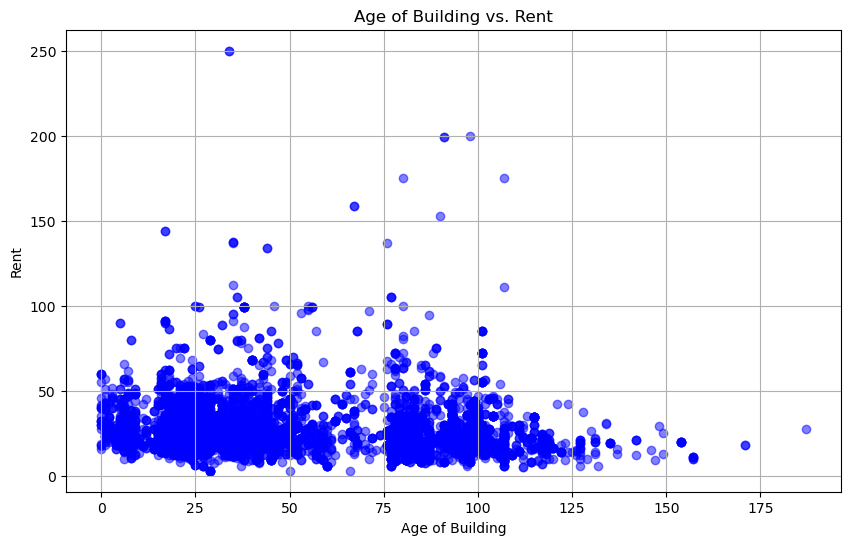

In [145]:
data = data[data['green_rating'] == 0]

age = data['age']
rent = data['Rent']

plt.figure(figsize=(10, 6))
plt.scatter(age, rent, color='blue', marker='o', alpha=0.5)
plt.xlabel('Age of Building')
plt.ylabel('Rent')
plt.title('Age of Building vs. Rent')
plt.grid(True)
plt.show()

These visualizations depict that there may not be as strong of a correlation between the age of buildings and rent.

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from greenbuildings.csv
data = pd.read_csv("/Users/gaytririyavasal/Downloads/greenbuildings.csv")

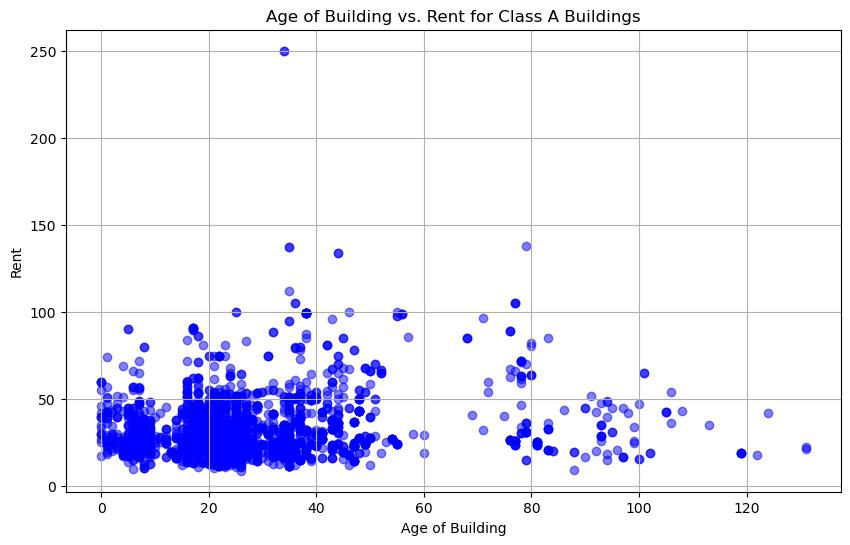

In [156]:
data = data[data['class_a'] == 1]

age = data['age']
rent = data['Rent']

plt.figure(figsize=(10, 6))
plt.scatter(age, rent, color='blue', marker='o', alpha=0.5)
plt.xlabel('Age of Building')
plt.ylabel('Rent')
plt.title('Age of Building vs. Rent for Class A Buildings')
plt.grid(True)
plt.show()

However, it does seem that many of the Class A buildings are younger buildings and thus may call for a greater rent price (due to their "newer" appeal).

Size v.s. Rent | Green Buildings

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from greenbuildings.csv
data = pd.read_csv("/Users/gaytririyavasal/Downloads/greenbuildings.csv")

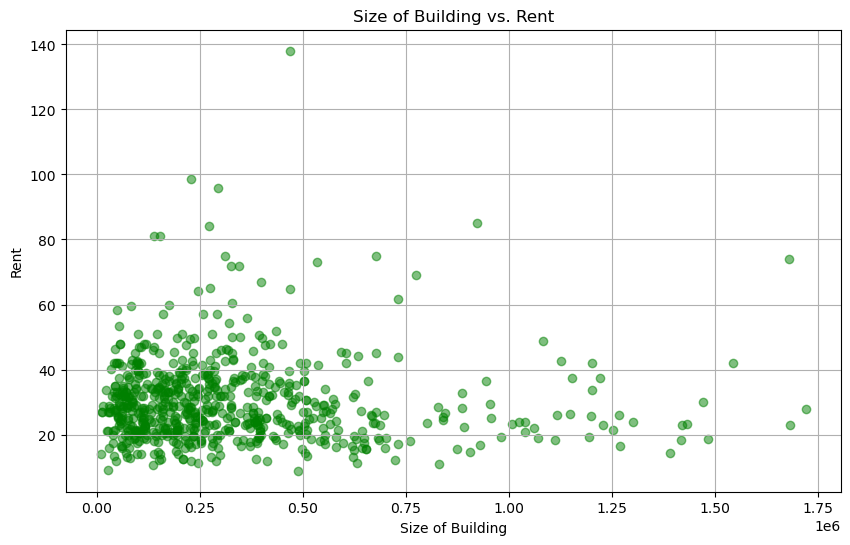

In [147]:
data = data[data['green_rating'] == 1]

size = data['size']
rent = data['Rent']

plt.figure(figsize=(10, 6))
plt.scatter(size, rent, color='green', marker='o', alpha=0.5)
plt.xlabel('Size of Building')
plt.ylabel('Rent')
plt.title('Size of Building vs. Rent')
plt.grid(True)
plt.show()

Size v.s. Rent | Non-Green Buildings

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from greenbuildings.csv
data = pd.read_csv("/Users/gaytririyavasal/Downloads/greenbuildings.csv")

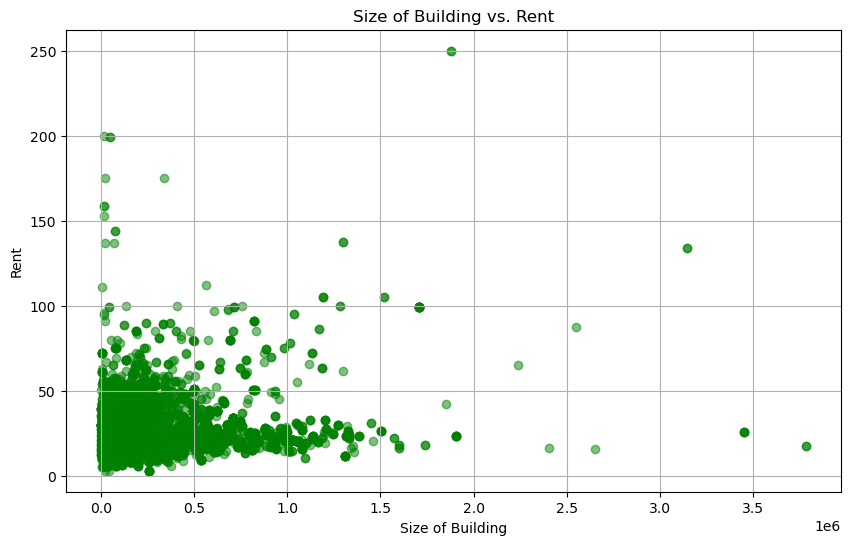

In [152]:
data = data[data['green_rating'] == 0]

size = data['size']
rent = data['Rent']

plt.figure(figsize=(10, 6))
plt.scatter(size, rent, color='green', marker='o', alpha=0.5)
plt.xlabel('Size of Building')
plt.ylabel('Rent')
plt.title('Size of Building vs. Rent')
plt.grid(True)
plt.show()

The above visualizations are another source of evidence of potential confoundedness, as building size appears to be correlated with rent.

Density of Age Variable

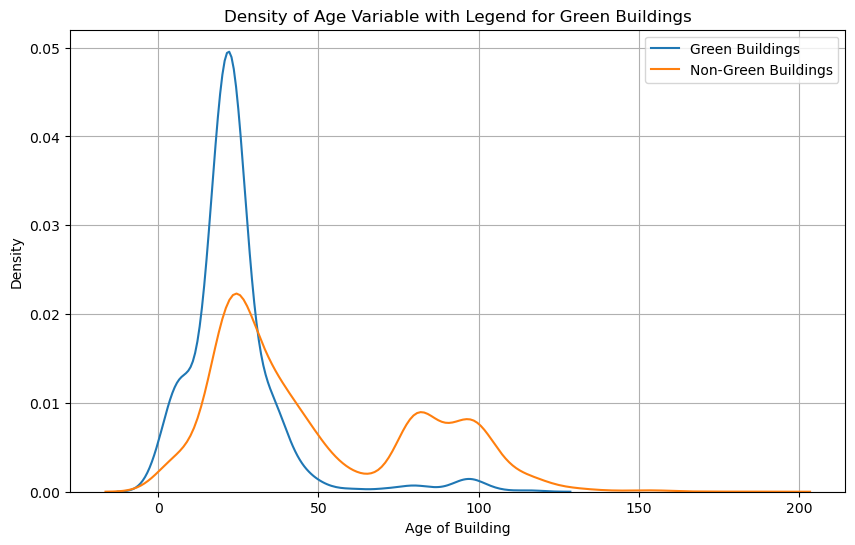

In [15]:
green_buildings = data[data['green_rating'] == 1]
non_green_buildings = data[data['green_rating'] == 0]

plt.figure(figsize=(10, 6))
sns.kdeplot(green_buildings['age'], label='Green Buildings')
sns.kdeplot(non_green_buildings['age'], label='Non-Green Buildings')
plt.xlabel('Age of Building')
plt.ylabel('Density')
plt.title('Density of Age Variable with Legend for Green Buildings')
plt.legend()
plt.grid(True)
plt.show()

From the following distribution, one can conclude that green buildings tend to be much younger than non-green buildings, which can in turn affect rent.

Density of Size Variable

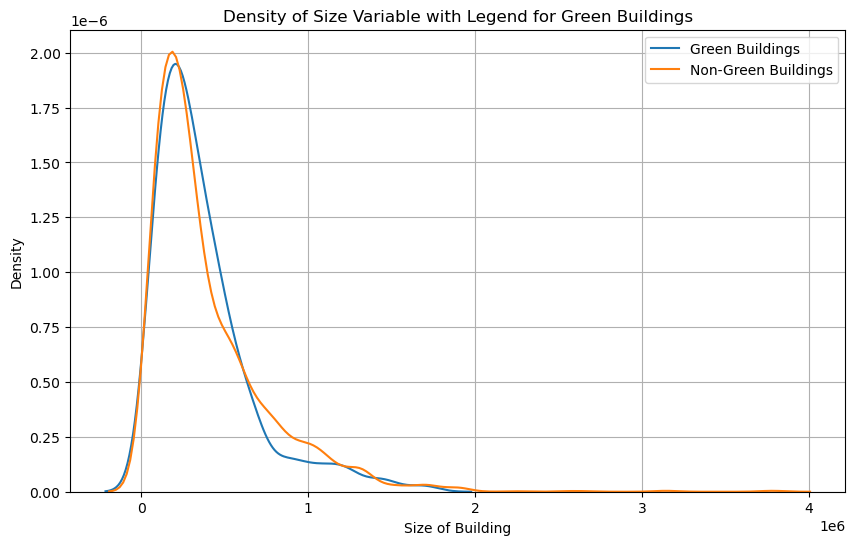

In [158]:
green_buildings = data[data['green_rating'] == 1]
non_green_buildings = data[data['green_rating'] == 0]

plt.figure(figsize=(10, 6))
sns.kdeplot(green_buildings['size'], label='Green Buildings')
sns.kdeplot(non_green_buildings['size'], label='Non-Green Buildings')
plt.xlabel('Size of Building')
plt.ylabel('Density')
plt.title('Density of Size Variable with Legend for Green Buildings')
plt.legend()
plt.grid(True)
plt.show()

The above graph reveals that green and non-green building proportions significantly increase with an increase in building size, at least initially.

Median Rent Over Time

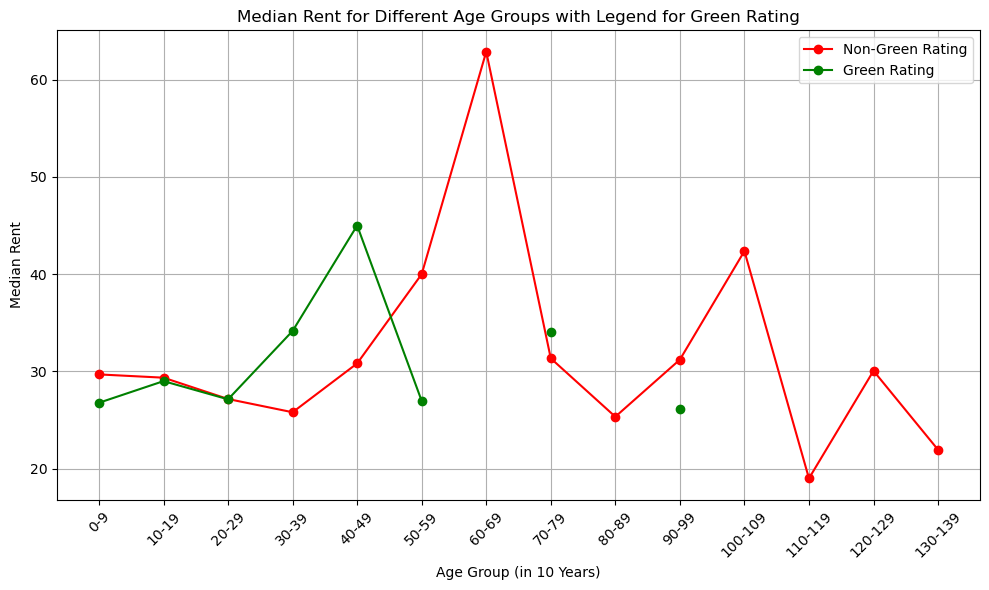

In [160]:
age_bins = range(0, max(data['age']) + 10, 10)
age_labels = [f"{age}-{age+9}" for age in age_bins[:-1]]

data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

median_rent_by_age = data.groupby(['age_group', 'green_rating'])['Rent'].median().unstack()

plt.figure(figsize=(10, 6))
plt.plot(median_rent_by_age.index, median_rent_by_age[0], marker='o', color='red', label='Non-Green Rating')
plt.plot(median_rent_by_age.index, median_rent_by_age[1], marker='o', color='green', label='Green Rating')
plt.xlabel('Age Group (in 10 Years)')
plt.ylabel('Median Rent')
plt.title('Median Rent for Different Age Groups with Legend for Green Rating')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Median Rent for Buildings of Different Sizes

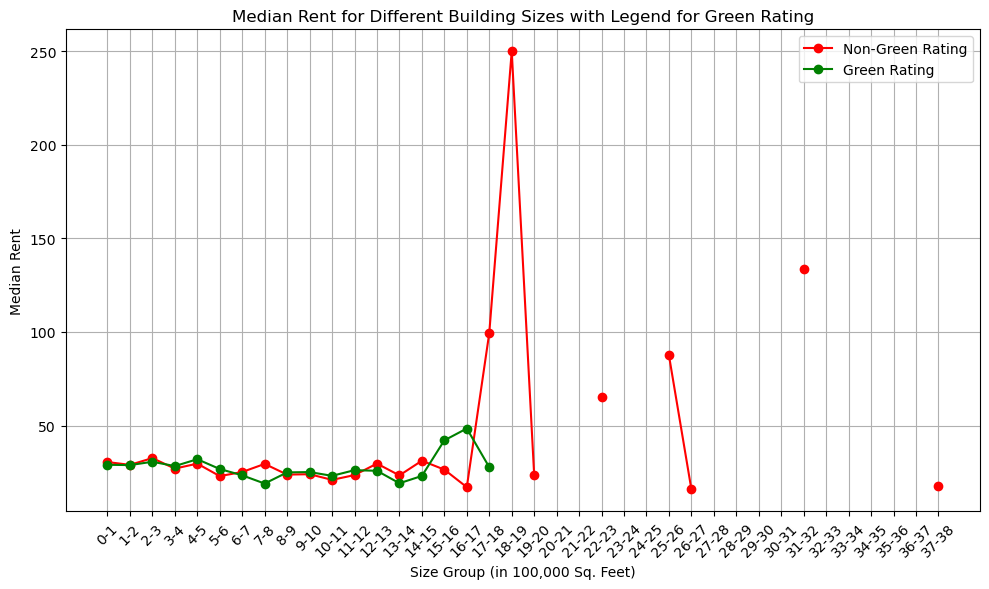

In [161]:
size_bins = range(0, int(max(data['size'])/100000 + 2))  # Add 2 to include the upper bound
size_labels = [f"{size}-{size+1}" for size in size_bins[:-1]]

data['size_group'] = pd.cut(data['size'] / 100000, bins=size_bins, labels=size_labels, right=False)

median_rent_by_size = data.groupby(['size_group', 'green_rating'])['Rent'].median().unstack()

plt.figure(figsize=(10, 6))
plt.plot(median_rent_by_size.index, median_rent_by_size[0], marker='o', color='red', label='Non-Green Rating')
plt.plot(median_rent_by_size.index, median_rent_by_size[1], marker='o', color='green', label='Green Rating')
plt.xlabel('Size Group (in 100,000 Sq. Feet)')
plt.ylabel('Median Rent')
plt.title('Median Rent for Different Building Sizes with Legend for Green Rating')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

These visualizations corroborate that rent differences do not follow an uniform pattern throughout different sizes and ages.

Final Conclusions: One should not agree with the statements of the guru, since he does not consider potential confounding variables. In particular, there are additional factors like building class and size, which can affect final results. Size can logically affect building rent, and Class A buildings, due to their clear maintainability and modern features, can lead to an increase in their rent prices. To "adjust" for such confounders, it is crucial to collect data on all known, identified confounders and accordingly control for them. In addition, rent difference does not follow an uniform pattern with size and age, so one cannot utilize a fixed difference in rent and compute returns that way.

Visual story telling part 2: Capital Metro data

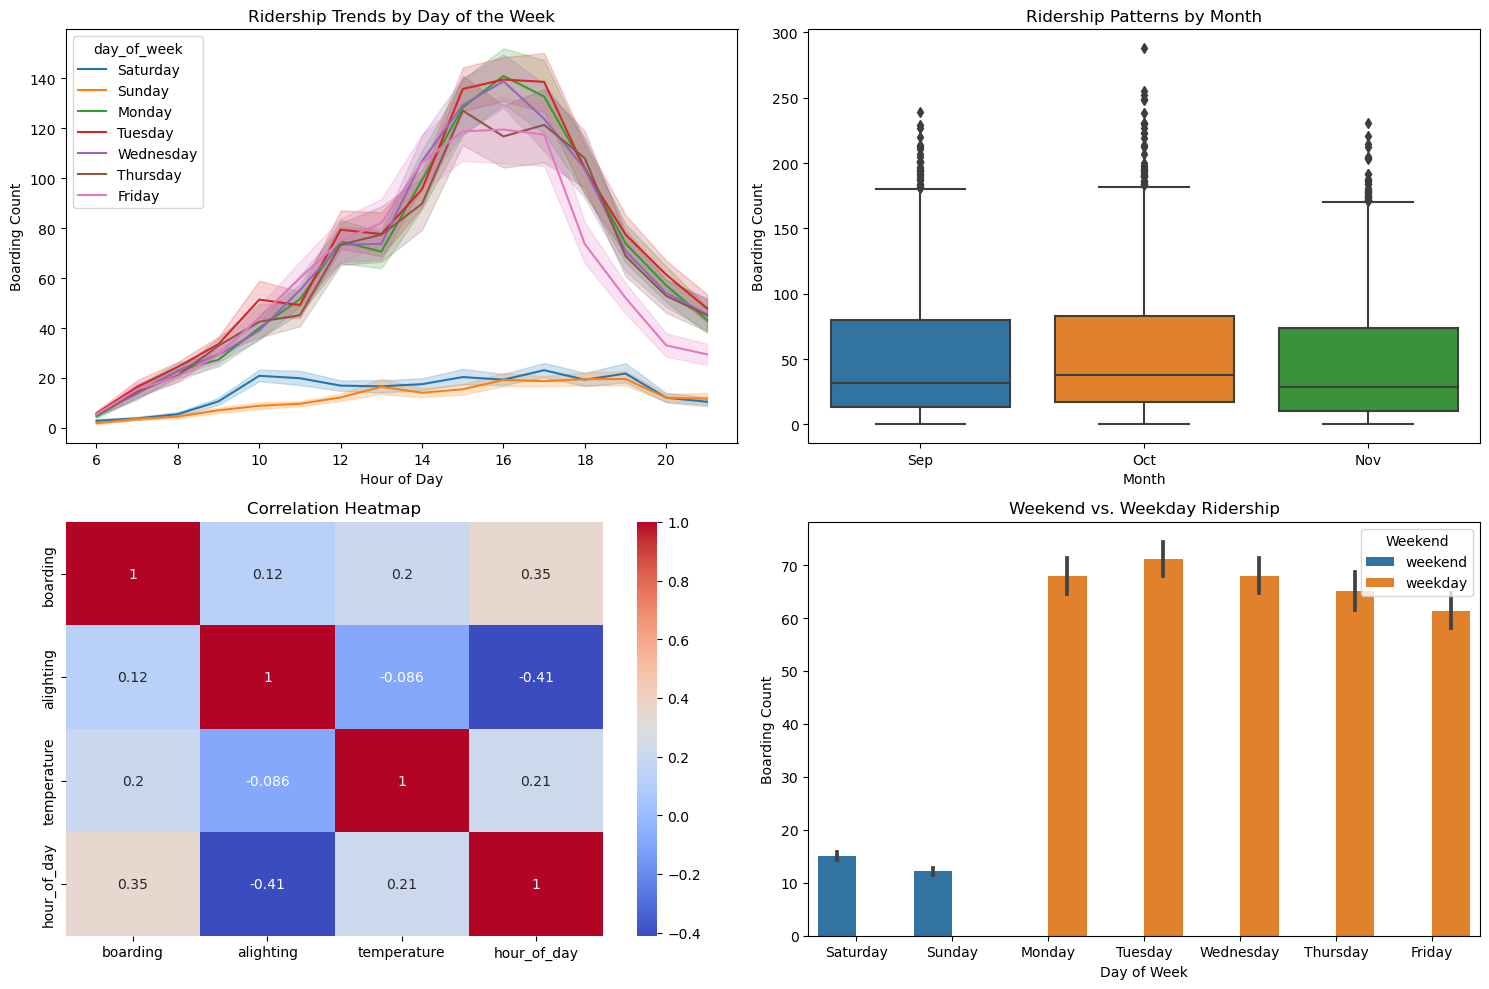

In [61]:
df = pd.read_csv("/Users/gaytririyavasal/Downloads/capmetro_UT.csv")

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract day of the week from the timestamp
df['day_of_week'] = df['timestamp'].dt.day_name()

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Ridership trends by day of the week
sns.lineplot(data=df, x='hour_of_day', y='boarding', hue='day_of_week', ax=axes[0, 0])
axes[0, 0].set_title('Ridership Trends by Day of the Week')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Boarding Count')

# Plot 2: Ridership patterns by month
sns.boxplot(data=df, x='month', y='boarding', ax=axes[0, 1])
axes[0, 1].set_title('Ridership Patterns by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Boarding Count')

# Plot 3: Correlation heatmap
corr_matrix = df[['boarding', 'alighting', 'temperature', 'hour_of_day']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap')

# Plot 4: Weekend vs. Weekday Ridership
sns.barplot(data=df, x='day_of_week', y='boarding', hue='weekend', ax=axes[1, 1])
axes[1, 1].set_title('Weekend vs. Weekday Ridership')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Boarding Count')
axes[1, 1].legend(title='Weekend', loc='upper right')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Plot 1: This first figure displays ridership trends by the hour of the day. For clearer analysis, the values are differentiated by the day of the week. Through doing so, one can find an interesting pattern regarding when peak ridership occurs on different days throughout the week.
    
Plot 2: The figure to the right of the first figure showcases ridership patterns by each month and leverages box plots to accomplish this. By inspecting this, one can gain insight into the monthly variations in ridership levels.
    
Plot 3: The first figure on the bottom row presents a correlation heatmap among boarding, alighting, temperature, and hour of the day. The map can be utilized to distinguish specific relationships between the variables.
    
Plot 4: The fourth and final figure to the right of Plot 3 compares weekend and weekday ridership through bar plots. There is a significant difference in ridership patterns on weekends versus weekdays.